WARNING - Using minimum redshift in EBL table.
WARNING - Using minimum redshift in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Using minimum redshift in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Using minimum redshift in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.
WARNING - Spectrum starts below minimum energy in EBL table.


100MeV-300GeV flux Crab 3FGL: 2.77247548784e-06
100MeV-300GeV flux Crab 3FHL: 2.39e-06
10GeV-1TeV flux Crab 3FHL: 8.66e-09
Numerical int flux Crab 3FHL 0.1--300GeV: 2.39342405057e-06
VHE Crab flux
VHE flux >300GeV for a trigger at z=0.0 is 4.3e-11 ph cm^-2 s^-1, or 0.35 Crab
VHE flux >300GeV for a trigger at z=0.1 is 2.5e-11 ph cm^-2 s^-1, or 0.20 Crab
VHE flux >300GeV for a trigger at z=0.2 is 1.4e-11 ph cm^-2 s^-1, or 0.11 Crab
VHE flux >300GeV for a trigger at z=0.3 is 7.3e-12 ph cm^-2 s^-1, or 0.06 Crab
VHE flux >300GeV for a trigger at z=0.4 is 3.8e-12 ph cm^-2 s^-1, or 0.03 Crab
VHE flux >300GeV for a trigger at z=0.5 is 1.9e-12 ph cm^-2 s^-1, or 0.02 Crab
VHE flux >300GeV for a trigger at z=0.6 is 9.1e-13 ph cm^-2 s^-1, or 0.01 Crab


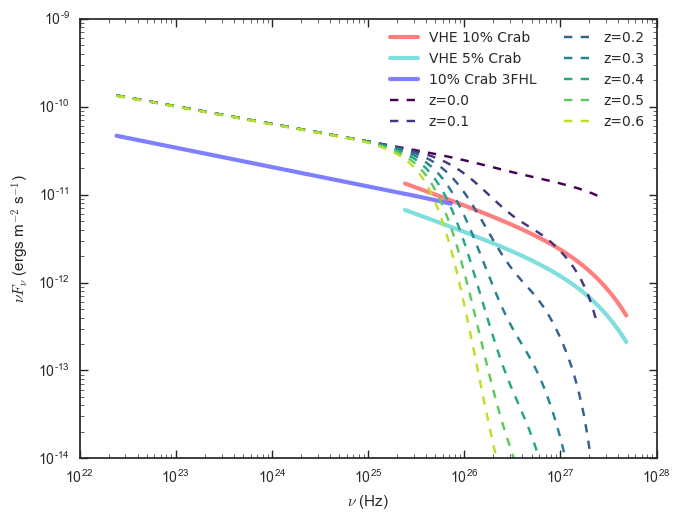

In [9]:
%matplotlib inline
#!/usr/bin/python

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
    import seaborn as sns
    sns.set_style("ticks") 
    #sns.set_style({"axes.axisbelow": False})
    sns.set_style({"xtick.direction": "in" ,"ytick.direction": "in"})
except:
    print("sns problem")


from scipy.optimize import curve_fit

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
### absorb: 
from VHEObserverTools.VOT import *
from VHEObserverTools.VOTPlot import Plot, PlotSpectrum
from VHEObserverTools.VOTSpectrum import *

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import matplotlib.pyplot as plt
from gammapy.catalog import SourceCatalog3FGL, SourceCatalog2FHL
from gammapy.utils.energy import EnergyBounds

from gammapy.datasets import gammapy_extra

#from gammapy.datasets import fetch_fermi_catalog
from gammapy import datasets
#from gammapy.catalog import fermi

def PL(E, N0, Ind, Enorm=1.0):
    return N0*(np.array(E)/Enorm)**(Ind)

tev2ergs=1.60217330


crab_flux_gt_200=2.36e-10             # above 200 GeV from Whipple Crab spectrum 
crab_flux_10_to_1000=1.3e-11/0.005    # from 3FHL paper
mev2hz=2.417990504024e+20


def calc_int_flux(gamma, C, E_pivot, E_low_GeV, E_high_GeV):
    return C/(1-gamma)*(E_high_GeV**(1-gamma) - E_low_GeV**(1-gamma)) / E_pivot**(-gamma)

def calc_int_flux_logpara(E_low_GeV, E_high_GeV, N0, alpha, beta, Eb):
    E = np.arange(E_low_GeV, E_high_GeV, (E_high_GeV-E_low_GeV)*1.0/2000.)
    dNdE = N0*(E/Eb)**(-alpha-beta*np.log10(np.array(E)/Eb))
    return np.trapz(dNdE, x=E)


spectralParsCrab = {"N0":3.43e-14, "index":-2.39, "E0":1000, "EC":14300}
VScrab = VOTSpectrum([],[], 100, 20000, 20000, "Null", 0, "HESSExpCutoff", **spectralParsCrab)


### plot:
fig = plt.figure(figsize=(7, 5.4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
ax = fig.add_subplot(111)

def PL(E, N0, Ind, Enorm=1.0):
    return N0*(np.array(E)/Enorm)**(Ind)


#EGeVs = np.arange(0.1, 300, 0.01)

crab_3FGL_params = [5.54e-7, -2.226, 0.63559]
crab_3FHL_params = [1.713e-10, -2.22, 22.73]

eMin = 0.1 
eMax = 10000
Nbins = 10000
eblModel = "Dominguez"
redshift = 0.0
#spectralModel = "HESSExpCutoff"
spectralModel="PowerLaw"
#spectralModel="LogParabola"
#PowerLaw: a simple power law with normalization ('N0', cm^-2 s^-1 GeV^-1),
#          index ('index', negative), pivot energy ("E0", GeV).
spectralPars3FGL = {"N0":crab_3FGL_params[0],"index":crab_3FGL_params[1],"E0":crab_3FGL_params[2]}
spectralPars3FHL = {"N0":crab_3FHL_params[0],"index":crab_3FHL_params[1],"E0":crab_3FHL_params[2]}

crab_int3FGL = calc_int_flux(-crab_3FGL_params[1], crab_3FGL_params[0], crab_3FGL_params[2], 0.1, 300)
crab_int3FHL = calc_int_flux(-crab_3FHL_params[1], crab_3FHL_params[0], crab_3FHL_params[2], 0.1, 300)
print("100MeV-300GeV flux Crab 3FGL: {}".format(crab_int3FGL))
print("100MeV-300GeV flux Crab 3FHL: {:.3g}".format(crab_int3FHL))

crab_int3FHL_10_1000 = calc_int_flux(-crab_3FHL_params[1], crab_3FHL_params[0], crab_3FHL_params[2], 10., 1000.)
print("10GeV-1TeV flux Crab 3FHL: {:.3g}".format(crab_int3FHL_10_1000))



VS_Crab_3FGL = VOTSpectrum([],[],eMin, 300, Nbins, eblModel, redshift, spectralModel,**spectralPars3FGL)
VS_Crab_3FHL = VOTSpectrum([],[],eMin, 300, Nbins, eblModel, redshift, spectralModel,**spectralPars3FHL)

def num_int(VS_Crab_3FHL, emin=0.1, emax=300, absorbed=True, verbose=False):
    trap_slice = np.where( (VS_Crab_3FHL.EBins>=emin) & (VS_Crab_3FHL.EBins<=emax) )
    if absorbed:
        trap_flux = np.trapz(np.array(VS_Crab_3FHL.dNdE_absorbed)[trap_slice[0]], x=np.array(VS_Crab_3FHL.EBins[trap_slice[0]]))
    else:
        trap_flux = np.trapz(np.array(VS_Crab_3FHL.dNdE)[trap_slice[0]], x=np.array(VS_Crab_3FHL.EBins[trap_slice[0]]))
    if verbose:
        print("Numerical int flux Crab 3FHL {}--{}GeV: {}".format(emin, emax, trap_flux))
    return trap_flux
num_int(VS_Crab_3FHL, verbose=True)

ax.plot(VScrab.EBins*1000.*mev2hz, VScrab.dNdE_absorbed*VScrab.EBins*VScrab.EBins*tev2ergs*1e-3*0.1, 
        'r-', lw=3, alpha=0.5, label="VHE 10% Crab")

ax.plot(VScrab.EBins*1000.*mev2hz, VScrab.dNdE_absorbed*VScrab.EBins*VScrab.EBins*tev2ergs*1e-3*0.05, 
        'c-', lw=3, alpha=0.5, label="VHE 5% Crab")


ax.plot(VS_Crab_3FHL.EBins*1000.*mev2hz,
        VS_Crab_3FHL.dNdE_absorbed*VS_Crab_3FHL.EBins*VS_Crab_3FHL.EBins*tev2ergs*1e-3*0.1,
        'b-', lw=3, alpha=0.5, label="10% Crab 3FHL")


print("VHE Crab flux")
f_crab_vhe = num_int(VScrab, emin=100, emax=10000)
f_crab_vhe200 = num_int(VScrab, emin=200, emax=10000)
f_crab_vhe300 = num_int(VScrab, emin=300, emax=10000)


plot_norm = 5.4927345e-11

for i, z_ in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]):
    spectralPars_powerlaw = {"N0":plot_norm,"index":-2.2,"E0":crab_3FHL_params[2]}
    VS_powerlaw = VOTSpectrum([],[],eMin, eMax, Nbins, eblModel, z_, spectralModel,**spectralPars_powerlaw)

    ax.plot(VS_powerlaw.EBins*1000.*mev2hz,
        VS_powerlaw.dNdE_absorbed*VS_powerlaw.EBins*VS_powerlaw.EBins*tev2ergs*1e-3,
        color=plt.cm.viridis(z_*1.5), ls='--', label="z={:.1f}".format(z_))
    f_ = num_int(VS_powerlaw, emin=100, emax=10000)
    #print("VHE flux >100GeV for a trigger at z={} is {:.2g} ph cm^-2 s^-1, or {:.2f} Crab".format(z_, f_, f_*1./f_crab_vhe))

    f_2 = num_int(VS_powerlaw, emin=200, emax=10000)
    #print("VHE flux >200GeV for a trigger at z={} is {:.2g} ph cm^-2 s^-1, or {:.2f} Crab".format(z_, f_2, f_2*1./f_crab_vhe200))
    
    f_3 = num_int(VS_powerlaw, emin=300, emax=10000)
    print("VHE flux >300GeV for a trigger at z={} is {:.2g} ph cm^-2 s^-1, or {:.2f} Crab".format(z_, f_3, f_3*1./f_crab_vhe300))



ax.set_xlabel(r'$\nu$ (Hz)')
ax.set_ylabel(r'$\nu F_\nu$ (ergs m$^{-2}$ s$^{-1}$)')
ax.set_ylim(1e-14, 1e-9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best', ncol=2, fontsize=10)
plt.tight_layout()

#plt.savefig("trigger_fermiGI_proposal.pdf")

